# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Damilare Sadiq

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [2]:
# Reading the data and veiwing it in pandas
df = pd.read_csv("salary.csv")
# Making a copy of the data
df_1 = df.copy()
df_1.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**I'm loading the data in pandas, making a copy of the data and showing the first 5(five) rows of the column.**

In [3]:
# Dropping the unnecessary columns
col_to_drp = [
    "Workclass",
    "Education",
    "Marital_status",
    "Occupation",
    "Relationship",
    "Race",
    "Country",
]
df_1.drop(columns=col_to_drp, inplace=True)
df_1.head()

,Age,Final_weight,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Salary
0,50,83311,13,Male,0,0,13,<=50K
1,38,215646,9,Male,0,0,40,<=50K
2,53,234721,7,Male,0,0,40,<=50K
3,28,338409,13,Female,0,0,40,<=50K
4,37,284582,14,Female,0,0,40,<=50K


**I'm dropping uneccessary columns in the data and showing the first five(5) rows.**

In [4]:
# Checking the shape of the data
df.shape

(32560, 15)

**Shape of the original data having 32560 rows and 15 columns.**

In [5]:
# Checking the shape of the copied data after dropping some variables.
df_1.shape

(32560, 8)

**Shape of the copied data after dropping the uneccessary columns showing 32560 rows and 8 columns.**

In [6]:
# Checking the missing value
df_1.isna().sum()

Age               0
Final_weight      0
Education_num     0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Salary            0
dtype: int64

**Checking if there are missing values in the data and as it's shown above there is zero(0) missing values in the columns.**

In [7]:
# Checking the percentage of value in salary
df_1["Salary"].value_counts(normalize=True).mul(100)

 <=50K    75.918305
 >50K     24.081695
Name: Salary, dtype: float64

**Here I'm checking the value count of the variables in the salary column.**

In [8]:
# Initializing the constant
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Salary"

**In the cell above I'm initializing the constant randow state and test size.**

In [9]:
from sklearn.model_selection import train_test_split

# Matrix as the independent features
X = df_1.drop(columns=TARGET)

# Vector as the target variable
y = df_1[TARGET]

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((26048, 7), (6512, 7))

**I'm splitting the data into train and test using the train_test_split from sklearn.**

In [10]:
# Showing the shuffled split of the y_train.
y_train.head()

6994      <=50K
17064     <=50K
18434     <=50K
3294      <=50K
31316     <=50K
Name: Salary, dtype: object

In [11]:
# Showing the y_test shuffled split first 5 rows.
y_test.head()

20712     <=50K
13495     <=50K
12367     <=50K
22401      >50K
18338     <=50K
Name: Salary, dtype: object

In [12]:
# Showing the X-train shuffled split first 5 rows.
X_train.head()

,Age,Final_weight,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week
6994,20,168863,10,Female,0,0,20
17064,22,270436,9,Male,0,0,40
18434,36,405644,9,Male,0,0,35
3294,22,51136,10,Female,0,0,60
31316,23,50953,10,Female,0,0,40


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cols_to_scale = ["Age", "Final_weight"]
cols_to_enc = ["Education_num", "Sex", "Capital_gain", "Capital_loss", "Hours_per_week"]

# OneHotEncoding
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# Scaler
scaler = MinMaxScaler()

# Creating a pipeline of coloumn transformer that encode and scale variables
col_transform = ColumnTransformer(
    transformers=[("ohe", ohe, cols_to_enc), ("scaler", scaler, cols_to_scale)],
    remainder="passthrough",
)

col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Education_num', 'Sex', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week']),
                                ('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight'])])

**In the cell above, I used a pipeline and column transformer to scale the age and final weight columns using MinMaxScaler and also to encode the education num, sex, capital gain, capital loss and hours per week columns using OneHotEncoder.**

In [14]:
from sklearn.linear_model import LogisticRegression


# Instantiating using Logistic Regression
logit = LogisticRegression(random_state=RANDOM_STATE)

# Adding logistic regression to the pipeline
pipe_logit = Pipeline(
    steps=[
        # The Column Transformer pipeline
        ("col_transform", col_transform),
        # The logistic Regression
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Education_num', 'Sex',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight'])])),
                ('logit', LogisticRegression(random_state=123))])

**I'm inistantiating the scaled and encoded variables using logistic regression and passing it to another pipeline.**

In [15]:
# Fitting
pipe_logit.fit(X_train, y_train)

# Making the predictions
y_pred = pipe_logit.predict(X_test)

# Probability of making over 50k(>50k)
y_proba = pipe_logit.predict_proba(X_test)[:, 1]

C:\Users\new\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**I'm using the logistic regression pipeline to build a machine learning module predicting the employees earning above or greater than $50k.**

In [16]:
len(y_pred)

6512

In [17]:
# Checking the predictions.
y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [18]:
# Checking the probability.
y_proba

array([0.21321917, 0.34864215, 0.1163262 , ..., 0.13236187, 0.00503311,
       0.07080511])

**Above are the probability of the employees earning above or greater than $50k.**

In [19]:
# Calculating the accuracy.
np.mean(y_test == y_pred)

0.8507371007371007

In [20]:
# Checking the percentage
y_test.value_counts(normalize=True).mul(100)

 <=50K    76.320639
 >50K     23.679361
Name: Salary, dtype: float64

In [21]:
# Accessing the model performance using metrics
from sklearn import metrics

# 1. The confusion matrix of metrics
labels = [0, 1]
labels = ["<=50K", ">50K"]

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[4796,  174],
       [ 798,  744]], dtype=int64)

**Accessing the performances of the model using confusion matrix of metrics and it shows the true positive and false positive on the left side and the false negative and true negative on the right side.**

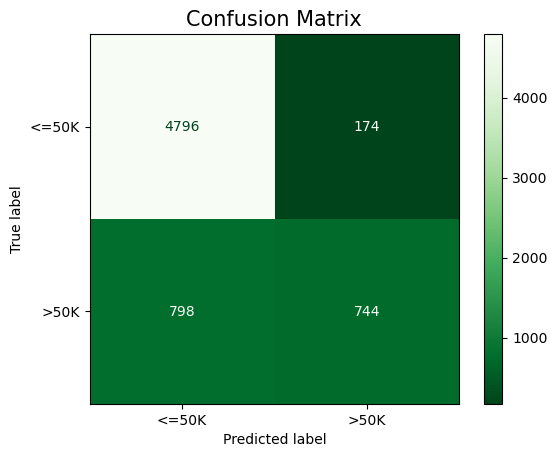

In [22]:
import matplotlib.pyplot as plt

# Display Confusion Matix
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)

disp.plot(cmap=plt.cm.Greens_r)
plt.title("Confusion Matrix", size=15)
plt.show()

**I used matplotlib to plot the confusion matrix metrics showing:** 

**true positive to be 4796,** 

**false positive is 798,**

**false negative 174,** 

**true negative is 744.**

In [23]:
# Calculating Recall
TP = 4796
FP = 798
FN = 174
TN = 744


Recall = (TP) / (TP + FN)
Recall

0.964989939637827

In [24]:
# Calculating Precision
Precision = TP / (TP + FP)
Precision

0.857347157668931

In [25]:
# F1 Score: Harmonic mean
F1_Score = (2 * Recall * Precision) / (Recall + Precision)
F1_Score

0.90798939795532

In [26]:
# The classification report of metrics
clf_reprt = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_reprt)

              precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      4970
        >50K       0.81      0.48      0.60      1542

    accuracy                           0.85      6512
   macro avg       0.83      0.72      0.76      6512
weighted avg       0.85      0.85      0.84      6512



In [27]:
# The roc_auc_score metrics
roc_auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_proba)
roc_auc_score

0.8787415804815926

**All the metrics scores for evaluating the performance of the model show how good the model is on a scale of 0-1 and the higher the score the better the model is.**